# Text Summary Methods

#### Text sample data 

In [90]:
text = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
 A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
 Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
 In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
 Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
 2010 marriage license application, according to court documents.
 Prosecutors said the marriages were part of an immigration scam.
 On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
 Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
 All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
 If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""

In [91]:
ARTICLE2 = "WASHINGTON — With Florida looking red early on Tuesday night, President Trump and his\
advisers thought they were witnessing a repeat of election night 2016, when a victory in Florida \
foreshadowed a victory over all.Inside the East Room, the mood was upbeat as hundreds of people, \
including cabinet secretaries, ambassadors and former officials who have remained loyal to Mr. Trump, \
mingled and dined on sliders and French fries. Officials who had been pessimistic about the president’s \
re-election chances suddenly started to picture four more years in power.That mirage of victory was pierced \
when Fox News called Arizona for former Vice President Joseph R. Biden Jr. at 11:20 p.m., with just 73 \
percent of the state’s vote counted.Mr. Trump and his advisers erupted at the news. If it was true \
that Arizona was lost, it would call into doubt on any claim of victory the president might be able to make.What \
ensued for Mr. Trump was a night of angry calls to Republican governors and advice from \
campaign aides that he ignored, leading to a middle-of-the-night presidential briefing in which \
he made a reckless and unsubstantiated string of remarks about the democratic process. Standing\
in the East Room at 2:30 a.m., he dismissed the election as a “fraud” and claimed he wanted to \
stop the counting of votes and leave the results to the Supreme Court.The Trump campaign knew Arizona \
could be up for grabs, but the Fox News call putting it in Mr. Biden’s column was symbolic, making it\
the first state that appeared to have flipped from the president’s 2016 batch of winning states. Gov.\
Doug Ducey, Republican of Arizona, had been on the phone all night with administration officials and \
campaign staff members, adamant that there were still Republican votes to be counted in his state."


In [92]:
ARTICLE3 = "A mass vaccination programme against Covid-19 is set to begin in the UK on Tuesday. While the\
government is working to ease the fears of those who are worried about safety, some people have a more \
primal fear - needles.My heart would be racing. My mind saying, 'calm down, it's going to be fine' \
but also, 'it's terrifying, it's going to really hurt you'. Then 'you don't know this person, so you '\
can't trust them'. I would be thinking of ways to get away from it.Raelene Goody, 31, who has cystic\
fibrosis, an inherited condition that causes lung infections and problems digesting food, regularly \
requires injections, including an annual flu jab.But from the age of four to her late teens, she \
suffered from severe needle phobia that would leave her shaking and often meant she had to be sedated.\
When will you be eligible for the Covid vaccine? How does the Pfizer vaccine work? The vaccine - your \
questions answered It's like when you are really scared of something like spiders and \
snakes and you want to run away. It's a similar feeling, except it is a needle, she says. \
Apparently I punched my dad in the face once, but I was so petrified I can't remember it.\
Raelene's severe phobia of injections, known as trypanophobia, in her younger years is not uncommon. \
Some others have a more general fear of needles, known as belonephobia. Studies show such a fear is \
highest in children and decreases with age. Nevertheless, it affects up to 10% of the overall population,\
according to charity Anxiety UK.Despite her phobia, Raelene, from West Sussex, was still able to go \
through with her flu vaccination each year, although it could sometimes take hours to administer the jab."

## 1) Word Frequency Algorithm

- https://becominghuman.ai/text-summarization-in-5-steps-using-nltk-65b21e352b65

In [4]:
def _create_frequency_table(text_string) -> dict:

    stopWords = set(stopwords.words("english"))
    words = word_tokenize(text_string)
    ps = PorterStemmer()

    freqTable = dict()
    for word in words:
        word = ps.stem(word)
        if word in stopWords:
            continue
        if word in freqTable:
            freqTable[word] += 1
        else:
            freqTable[word] = 1

    return freqTable



def _score_sentences(sentences, freqTable) -> dict:
    sentenceValue = dict()

    for sentence in sentences:
        word_count_in_sentence = (len(word_tokenize(sentence)))
        for wordValue in freqTable:
            if wordValue in sentence.lower():
                if sentence[:10] in sentenceValue:
                    sentenceValue[sentence[:10]] += freqTable[wordValue]
                else:
                    sentenceValue[sentence[:10]] = freqTable[wordValue]

        sentenceValue[sentence[:10]] = sentenceValue[sentence[:10]] // word_count_in_sentence

    return sentenceValue


def _find_average_score(sentenceValue) -> int:
    sumValues = 0
    for entry in sentenceValue:
        sumValues += sentenceValue[entry]

    # Average value of a sentence from original text
    average = int(sumValues / len(sentenceValue))

    return average


def _generate_summary(sentences, sentenceValue, threshold):
    sentence_count = 0
    summary = ''

    for sentence in sentences:
        if sentence[:10] in sentenceValue and sentenceValue[sentence[:10]] > (threshold):
            summary += " " + sentence
            sentence_count += 1

    return summary

In [5]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

# 1 Create the word frequency table
freq_table = _create_frequency_table(text)

'''
We already have a sentence tokenizer, so we just need 
to run the sent_tokenize() method to create the array of sentences.
'''

# 2 Tokenize the sentences
sentences = sent_tokenize(text)

# 3 Important Algorithm: score the sentences
sentence_scores = _score_sentences(sentences, freq_table)

# 4 Find the threshold
threshold = _find_average_score(sentence_scores)

# 5 Important Algorithm: Generate the summary
# Note: smaller threshold values generate more text
summary = _generate_summary(sentences, sentence_scores, 1.5 * threshold)

print(summary)

 Only 18 days after that marriage, she got hitched yet again. In 2010, she married once more, this time in the Bronx. If convicted, Barrientos faces up to four years in prison.


## 2) TextRank embedding Algorithm

- https://www.analyticsvidhya.com/blog/2018/11/introduction-text-summarization-textrank-python/
- Note: requires downloading an ~800Mb word embeddings model

## 3) Unsupervised Text Summarization using Sentence Embeddings

- Note: requires a ~2GB word embeddings model

## 4) TextRank Algorithm

In [ ]:
!pip install gensim

In [6]:
from gensim.summarization.summarizer import summarize
summarize(ARTICLE3, ratio=0.1, word_count=None, split=False)

'I would be thinking of ways to get away from it.Raelene Goody, 31, who has cysticfibrosis, an inherited condition that causes lung infections and problems digesting food, regularly requires injections, including an annual flu jab.But from the age of four to her late teens, she suffered from severe needle phobia that would leave her shaking and often meant she had to be sedated.When will you be eligible for the Covid vaccine?'

## TextRank

- https://towardsdatascience.com/understand-text-summarization-and-create-your-own-summarizer-in-python-b26a9f09fc70

In [ ]:
#!/usr/bin/env python
# coding: utf-8

from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx
from nltk import sent_tokenize

 
def read_article(text):
    
    sentences = sent_tokenize(text)    
    return sentences

def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []
 
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
 
    all_words = list(set(sent1 + sent2))
 
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
 
    # build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1
 
    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1
 
    return 1 - cosine_distance(vector1, vector2)
 
def build_similarity_matrix(sentences, stop_words):
    # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
 
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2: #ignore if both are same sentences
                continue 
            similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stop_words)

    return similarity_matrix


def generate_summary(text, top_n=5):
    stop_words = stopwords.words('english')
    summarize_text = []

    # Step 1 - Read text anc split it
    sentences =  read_article(text)

    # Step 2 - Generate Similary Martix across sentences
    sentence_similarity_martix = build_similarity_matrix(sentences, stop_words)

    # Step 3 - Rank sentences in similarity martix
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
    scores = nx.pagerank(sentence_similarity_graph)

    # Step 4 - Sort the rank and pick top sentences
    ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    
    print("Indexes of top ranked_sentence order are ", ranked_sentence)    

    for i in range(top_n):
        summarize_text.append(" ".join(ranked_sentence[i][1]))

    # Step 5 - Offcourse, output the summarize texr
    print("Summarize Text: \n", ". ".join(summarize_text))

# let's begin
generate_summary(ARTICLE2, 3)

# Transformer summariser

In [ ]:
!pip install bert-extractive-summarizer==0.5.1

In [ ]:
from summarizer import Summarizer
body = ARTICLE3
model = Summarizer()
result = model(body, ratio=1, min_length=90, max_length=1000, algorithm='t5-small') 

In [9]:
result

"While thegovernment is working to ease the fears of those who are worried about safety, some people have a more primal fear - needles. My mind saying, 'calm down, it's going to be fine' but also, 'it's terrifying, it's going to really hurt you'. Raelene Goody, 31, who has cysticfibrosis, an inherited condition that causes lung infections and problems digesting food, regularly requires injections, including an annual flu jab. But from the age of four to her late teens, she suffered from severe needle phobia that would leave her shaking and often meant she had to be sedated. The vaccine - your questions answered It's like when you are really scared of something like spiders and snakes and you want to run away. Raelene's severe phobia of injections, known as trypanophobia, in her younger years is not uncommon. Nevertheless, it affects up to 10% of the overall population,according to charity Anxiety UK.Despite her phobia, Raelene, from West Sussex, was still able to go through with her fl

## T5-small Hugging Face model

In [ ]:
!pip install transformers

In [171]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

def predict_summariser(text):
    # initialize the model architecture and weights
    model = T5ForConditionalGeneration.from_pretrained("t5-small")
    
    # initialize the model tokenizer
    tokenizer = T5Tokenizer.from_pretrained("t5-small")

    # encode the text into tensor of integers using the appropriate tokenizer
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=512, truncation=True)

    # generate the summarization output
    outputs = model.generate(
        inputs, 
        max_length=600, 
        min_length=100, 
        length_penalty=0.1, 
        num_beams=4, 
        early_stopping=False, 
        do_sample=True)
    
    return tokenizer.decode(outputs[0])

In [173]:
predict_summariser(ARTICLE2)

Some weights of the model checkpoint at t5-small were not used when initializing T5ForConditionalGeneration: ['decoder.block.0.layer.1.EncDecAttention.relative_attention_bias.weight']
- This IS expected if you are initializing T5ForConditionalGeneration from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing T5ForConditionalGeneration from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


'<pad> president and hisadvisers thought they were witnessing a repeat of election night 2016 when a victory in Florida foreshadowed a victory over all. the mood was upbeat as hundreds of people, including cabinet secretaries, ambassadors and former officials mingled and dined on sliders and French fries. if it was true that Arizona was lost, it would call into doubt on any claim of victory the president might be able to make.</s>'

In [166]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

# initialize the model architecture and weights
model = T5ForConditionalGeneration.from_pretrained("t5-small")
# initialize the model tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-small")

# encode the text into tensor of integers using the appropriate tokenizer
inputs = tokenizer.encode("summarize: " + ARTICLE3, return_tensors="pt", max_length=512, truncation=True)

# generate the summarization output
outputs = model.generate(
    inputs, 
    max_length=600, 
    min_length=200, 
    length_penalty=0.1, 
    num_beams=4, 
    early_stopping=False, 
    do_sample=True)
# just for debugging
print(outputs)
print(tokenizer.decode(outputs[0]))

In [167]:
inputs.size()

torch.Size([1, 426])

In [168]:
print(tokenizer.decode(inputs[0]))

summarize: A mass vaccination programme against Covid-19 is set to begin in the UK on Tuesday. While thegovernment is working to ease the fears of those who are worried about safety, some people have a more primal fear - needles.My heart would be racing. My mind saying, 'calm down, it's going to be fine' but also, 'it's terrifying, it's going to really hurt you'. Then 'you don't know this person, so you 'can't trust them'. I would be thinking of ways to get away from it.Raelene Goody, 31, who has cysticfibrosis, an inherited condition that causes lung infections and problems digesting food, regularly requires injections, including an annual flu jab.But from the age of four to her late teens, she suffered from severe needle phobia that would leave her shaking and often meant she had to be sedated.When will you be eligible for the Covid vaccine? How does the Pfizer vaccine work? The vaccine - your questions answered It's like when you are really scared of something like spiders and snake

In [169]:
# generate the summarization output
outputs = model.generate(
    inputs, 
    max_length=600, 
    min_length=200, 
    length_penalty=0.1, 
    num_beams=4, 
    early_stopping=False, 
    do_sample=True)
# just for debugging
print(outputs)
print(tokenizer.decode(outputs[0]))

tensor([[    0,     3,     9,  3294, 24639,  2486,   581,   638,  6961,  4481,
            19,   356,    12,  1731,    16,     8,     3,  1598,    30,     3,
            17,    76,    15,     7,  1135,     3,     5,   128,   151,    43,
             3,     9,    72,  3778,    40,  2971,     3,    18, 11769,     7,
             3,     5,     8,   789,    19,   464,    12,  4226,     8, 14935,
            13,   273,  9220,    81,  1455,     3,     5,   128,   151,    43,
             3,     9,    72,  3778,    40,  2971,     3,    18, 11769,     7,
             3,     5,     3,    31,  4188,   278,    31,    17,   214,    48,
           568,     6,    78,    25,     3,    31,  1608,    31,    17,  2019,
           135,    31,     6,   845,     8,  2664,    18,  1201,    18,  1490,
             3,     5,   255,    65, 26530,   447, 20602,     7,   159,     6,
            46,     3, 23665,  1706,     5,    61,    61,     2,     5,     3,
           233,     3,   233,   509,  6961,  4481,  

## Sentiment and Subjectivity Analysis

In [ ]:
!pip install textblob==0.15.3

In [151]:
from textblob import TextBlob

def predict_sentiment(text):
    """
    Input
    ----------
    text(string)

    Returns
    ----------
    The sentiment and sentiment score ranging from [-1,1]
    """

    TextBlob_object = TextBlob(text)
    sentiment_score = TextBlob_object.sentiment.polarity
    
    if sentiment_score == 0:
        output = "Neutral sentiment: " + str(sentiment_score)
    elif sentiment_score > 0:
        output = "Positive sentiment: " + str(sentiment_score)
    else:
        output = "Negative sentiment: " + str(sentiment_score)
   
    return output  


def predict_subjectivity(text):
    """
    Input
    ----------
    text(string)

    Returns
    ----------
    The subjectivity score ranging from [0,1]
    """

    TextBlob_object = TextBlob(text)
    subjectivity_score = TextBlob_object.sentiment.subjectivity
    output = "Subjectivity: " + str(subjectivity_score)
    
    return output

In [155]:
predict_sentiment("I love piano")

'Positive sentiment: 0.5'

In [156]:
predict_subjectivity("I love piano")

'Subjectivity: 0.6'

## Spell Checker

In [143]:
b = TextBlob("I wanted goood speling!")
print(b.correct())

I wanted good spelling!


# Text readabilty

In [ ]:
!pip install textstat==0.7.0

In [93]:
import textstat

# note this has to be completed before text preprocessing 
textstat.flesch_reading_ease(text)

48.67

## Emotion analysis usingh the NRC Lexicon

In [ ]:
!pip install SimpleText==1.0.3
!pip install NRCLex==3.0.0

In [111]:
from nrclex import NRCLex
from SimpleText.preprocessor import lowercase, strip_accents, strip_punctuation, strip_url 

text = ARTICLE2

# preprocess the text 
text = lowercase(text) 
text = strip_accents(text)
text = strip_punctuation(text)
text = strip_url(text) 

In [112]:
text_object = NRCLex(text)

In [117]:
# only get scores for: fear, anger, trust, surprise, sadness, disgust, joy, anticipation 
emotion_scores_dictionary = text_object.affect_frequencies

keys = ['fear', 'anger', 'trust', 'sadness', 'disgust', 'joy']

filtered_emotion_scores_dictionary = dict((k, round(emotion_scores_dictionary[k], 4)) for k in keys if k in emotion_scores_dictionary)
filtered_emotion_scores_dictionary

{'fear': 0.0375,
 'anger': 0.05,
 'trust': 0.2,
 'sadness': 0.0625,
 'disgust': 0.025,
 'joy': 0.1}

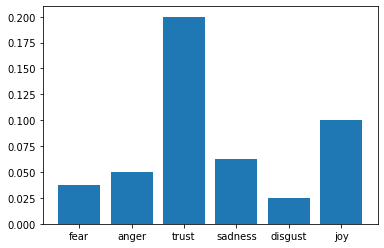

In [118]:
import matplotlib.pyplot as plt

D = filtered_emotion_scores_dictionary

plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.show;

In [119]:
words_emotions_dictionary = text_object.affect_dict

# inverse the keys and values in the dictionary so the keys are emotions and values are the words
emotions_words_dictionary = {}
for k,v in words_emotions_dictionary.items():
    for x in v:
        emotions_words_dictionary.setdefault(x,[]).append(k)

emotions_words_dictionary = dict((k, emotions_words_dictionary[k]) for k in keys if k in emotions_words_dictionary)
emotions_words_dictionary

{'fear': ['loyal', 'doubt', 'reckless'],
 'anger': ['vote', 'angry', 'reckless', 'fraud'],
 'trust': ['president',
  'victory',
  'cabinet',
  'loyal',
  'vote',
  'true',
  'doubt',
  'calls',
  'advice',
  'leading',
  'winning'],
 'sadness': ['vote', 'lost', 'doubt', 'leave', 'winning'],
 'disgust': ['angry', 'winning'],
 'joy': ['victory', 'loyal', 'vote', 'true', 'winning']}

In [110]:
text_object.top_emotions

{'fear': 0.16129032258064516,
 'anger': 0.13978494623655913,
 'anticip': 0.0,
 'trust': 0.12903225806451613,
 'surprise': 0.010752688172043012,
 'positive': 0.11827956989247312,
 'negative': 0.12903225806451613,
 'sadness': 0.06451612903225806,
 'disgust': 0.043010752688172046,
 'joy': 0.043010752688172046,
 'anticipation': 0.16129032258064516}

In [ ]:
#Return words list.

text_object.words


#Return sentences list.

text_object.sentences


#Return affect list.

text_object.affect_list


#Return affect dictionary.

text_object.affect_dict


#Return raw emotional counts.

text_object.raw_emotion_scores


#Return highest emotions.

text_object.top_emotions


#Return affect frequencies.

text_object.affect_frequencies

In [ ]:
def get_emotion_scores(text):

    """
    Input
    ----------
    text(string)

    Returns
    ----------
    emotions_dictionary (list): Two items in the list: 1)  a dictionary of scores 
                                for each emotions and 2) a dictionary of emotions
                                and words from the text associated with the emotion
    """

    # preprocess the text 
    text = lowercase(text) 
    text = strip_accents(text)
    text = strip_punctuation(text)
    text = strip_url(text) 

    # instantiate the text object 
    text_object = NRCLex(text)

    # get scores for: fear, anger, trust, surprise, sadness, disgust, joy, anticipation 
    emotion_scores_dictionary = text_object.affect_frequencies
    keys = ['fear', 'anger', 'trust', 'surprise', 'sadness', 'disgust', 'joy', 'anticipation']
    filtered_emotion_scores_dictionary = dict((k, round(emotion_scores_dictionary[k], 4)) for k in keys if k in emotion_scores_dictionary)

    # get a dictionary of the words corresponding to each emotion
    words_emotions_dictionary = text_object.affect_dict

    # inverse the keys and values in the dictionary so the keys are emotions and values are the words
    emotions_words_dictionary = {}
    for k,v in words_emotions_dictionary.items():
        for x in v:
            emotions_words_dictionary.setdefault(x,[]).append(k)

    # get emotion/word association for: fear, anger, trust, surprise, sadness, disgust, joy, anticipation
    filtered_emotions_words_dictionary = dict((k, emotions_words_dictionary[k]) for k in keys if k in emotions_words_dictionary)

    emotions_output = [filtered_emotion_scores_dictionary, filtered_emotions_words_dictionary]

    return emotions_output

## Web scrapping

In [ ]:
!pip install newspaper3k==0.2.8
!pip install validators==0.18.2

In [233]:
from newspaper import Article
 
url = "http://theautomatic.net/2020/08/05/how-to-scrape-news-articles-with-python/"
url2 = 'http://fox13now.com/2013/12/30/new-year-new-laws-obamacare-pot-guns-and-drones/'

In [ ]:
import validators

test_text = 'http://x13now.com/2013/12/30/new-year-new-laws-obamacare-pot-guns-and-drones/'

valid=validators.url(test_text)

if valid==True:
    try: 
        test_text = url_text_extractor(test_text)

    except:
        raise AttributeError("IncorrectUrl")

# Other resources

- Types of extractive text summarisation methods: https://pkghosh.wordpress.com/2019/06/27/six-unsupervised-extractive-text-summarization-techniques-side-by-side/

- TextRank: https://towardsdatascience.com/understand-text-summarization-and-create-your-own-summarizer-in-python-b26a9f09fc70